In [1]:
# Name - Jahnavi Yelamanchi
# Reg. No. - 20BCE0413
# Campus - Vellore

# Build a CNN model for Bird species

In [3]:
!unzip '/content/drive/MyDrive/DATASETS/Bird_Species_Classification.zip'

Archive:  /content/drive/MyDrive/DATASETS/Bird_Species_Classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_45

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [5]:
train_gen = ImageDataGenerator(rescale=1./255, 
                               shear_range=0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True )
test_gen = ImageDataGenerator(rescale=1./255)

In [6]:
train = train_gen.flow_from_directory('/content/train_data/train_data', 
                                      target_size = (224, 224), 
                                      class_mode = 'categorical',
                                      batch_size = 15)
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                      target_size = (224, 224), 
                                      class_mode = 'categorical',
                                      batch_size = 15)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [7]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [8]:
# CNN

from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential, Model

In [9]:
model = Sequential()
model.add(Convolution2D(20, (3,3), activation = 'relu', input_shape = (224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(45, activation='relu'))
model.add(Dense(16, activation='softmax'))

In [10]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
model.fit(train, batch_size = 8, validation_data = test, epochs = 15)

Epoch 1/15
10/10 [==============================] - 101s 10s/step - loss: 14.5067 - accuracy: 0.0467 - val_loss: 2.7720 - val_accuracy: 0.0446
Epoch 2/15
10/10 [==============================] - 88s 10s/step - loss: 2.8414 - accuracy: 0.0333 - val_loss: 2.7720 - val_accuracy: 0.0573
Epoch 3/15
10/10 [==============================] - 122s 13s/step - loss: 2.7712 - accuracy: 0.0533 - val_loss: 3.2343 - val_accuracy: 0.0510
Epoch 4/15
10/10 [==============================] - 86s 9s/step - loss: 2.7865 - accuracy: 0.0867 - val_loss: 2.7292 - val_accuracy: 0.0701
Epoch 5/15
10/10 [==============================] - 120s 13s/step - loss: 2.6980 - accuracy: 0.1333 - val_loss: 2.7146 - val_accuracy: 0.1847
Epoch 6/15
10/10 [==============================] - 88s 9s/step - loss: 2.6598 - accuracy: 0.1400 - val_loss: 2.7247 - val_accuracy: 0.1401
Epoch 7/15
10/10 [==============================] - 86s 9s/step - loss: 2.6464 - accuracy: 0.2200 - val_loss: 2.7248 - val_accuracy: 0.1274
Epoch 8/15
1

In [12]:
model.save('birdSpecies.h5')

In [13]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

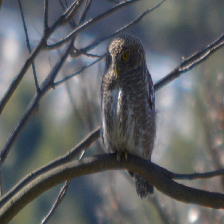

In [14]:
img = image.load_img('/content/test_data/test_data/jglowl/_D32_10593.jpg', target_size = (224, 224))
img

In [15]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
pred = np.argmax(model.predict(img))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo','indvul','jglowl', 'lbicrw','mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 170ms/step
0
blasti


## Model Tuning (Adding feature extraction layers)

In [16]:
model = Sequential()
model.add(Convolution2D(12, (3,3), activation = 'relu', input_shape = (224, 224, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(24, (3,3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(36, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) 
model.add(Dense(62, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(16, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 12)      336       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 12)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 24)      2616      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 24)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 36)        7812      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 36)      

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.fit(train, batch_size = 8, validation_data = test, epochs = 50)

Epoch 1/50
10/10 [==============================] - 95s 10s/step - loss: 2.7950 - accuracy: 0.1000 - val_loss: 2.7543 - val_accuracy: 0.0892
Epoch 2/50
10/10 [==============================] - 88s 9s/step - loss: 2.7273 - accuracy: 0.1067 - val_loss: 2.7601 - val_accuracy: 0.1210
Epoch 3/50
10/10 [==============================] - 91s 10s/step - loss: 2.7091 - accuracy: 0.1333 - val_loss: 2.7146 - val_accuracy: 0.1274
Epoch 4/50
10/10 [==============================] - 88s 9s/step - loss: 2.6763 - accuracy: 0.1733 - val_loss: 2.7706 - val_accuracy: 0.0764
Epoch 5/50
10/10 [==============================] - 90s 10s/step - loss: 2.5572 - accuracy: 0.2000 - val_loss: 2.6400 - val_accuracy: 0.1592
Epoch 6/50
10/10 [==============================] - 90s 9s/step - loss: 2.4355 - accuracy: 0.2000 - val_loss: 2.5805 - val_accuracy: 0.2166
Epoch 7/50
10/10 [==============================] - 89s 10s/step - loss: 2.2695 - accuracy: 0.3000 - val_loss: 2.5762 - val_accuracy: 0.2293
Epoch 8/50
10/10

In [20]:
model.save('birdSpeciesMEGA.h5')

In [21]:
img1 = image.load_img('/content/test_data/test_data/jglowl/_D32_10593.jpg', target_size = (224, 224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0) 
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo','indvul','jglowl', 'lbicrw','mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 171ms/step
1
bonegl


In [22]:
img2 = image.load_img('/content/test_data/test_data/hilpig/P1050045.jpg', target_size = (224, 224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo','indvul','jglowl', 'lbicrw','mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 21ms/step
13
mgprob


In [23]:
# Correct output

img3 = image.load_img('/content/test_data/test_data/cbrtsh/_D32_10313.jpg', target_size = (224, 224))
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3, axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo','indvul','jglowl', 'lbicrw','mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 21ms/step
3
cbrtsh


In [24]:

img4 = image.load_img('/content/test_data/test_data/wcrsrt/11382746854_7ce73793b3_o.jpg', target_size = (224, 224))
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4, axis=0)
pred = np.argmax(model.predict(img4))
print(pred)
output = ['blasti','bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo','indvul','jglowl', 'lbicrw','mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
0
blasti


In [25]:
# Submitted By - Madhusmita Mukherjee 20BCE2783

**Using Transfer Learning Model - VGG16**

In [26]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [27]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

58889256/58889256 [==============================] - 4s 0us/step


In [28]:
for layer in vgg.layers:
  print(layer)

In [29]:
for layer in vgg.layers:
  layer.trainable=False

In [30]:
x = Flatten()(vgg.output)

In [31]:
prediction = Dense(16,activation='softmax')(x)

In [32]:
v_model = Model(inputs=vgg.input, outputs=prediction)

In [33]:
v_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [34]:
v_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
v_model.fit_generator(train, validation_data = test, epochs=25, steps_per_epoch=len(train), validation_steps=len(test))

<ipython-input-17-c3f247764371>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  v_model.fit_generator(train, validation_data = test, epochs=25, steps_per_epoch=len(train), validation_steps=len(test))


Epoch 1/25
10/10 [==============================] - 99s 10s/step - loss: 4.0388 - accuracy: 0.1267 - val_loss: 3.3661 - val_accuracy: 0.2038
Epoch 2/25
10/10 [==============================] - 84s 9s/step - loss: 1.7531 - accuracy: 0.4867 - val_loss: 2.9064 - val_accuracy: 0.2548
Epoch 3/25
10/10 [==============================] - 84s 9s/step - loss: 1.0565 - accuracy: 0.6733 - val_loss: 2.9747 - val_accuracy: 0.3185
Epoch 4/25
10/10 [==============================] - 119s 13s/step - loss: 0.3667 - accuracy: 0.9133 - val_loss: 2.8349 - val_accuracy: 0.3694
Epoch 5/25
10/10 [==============================] - 84s 9s/step - loss: 0.2720 - accuracy: 0.9467 - val_loss: 2.8999 - val_accuracy: 0.3567
Epoch 6/25
10/10 [==============================] - 119s 13s/step - loss: 0.1766 - accuracy: 0.9733 - val_loss: 2.9980 - val_accuracy: 0.3567
Epoch 7/25
10/10 [==============================] - 84s 9s/step - loss: 0.1544 - accuracy: 0.9600 - val_loss: 3.0099 - val_accuracy: 0.3694
Epoch 8/25
10/1

In [ ]:
v_model.fit_generator(train, validation_data = test, epochs=25, steps_per_epoch=len(train), validation_steps=len(test))

<ipython-input-18-c3f247764371>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  v_model.fit_generator(train, validation_data = test, epochs=25, steps_per_epoch=len(train), validation_steps=len(test))


Epoch 1/25
10/10 [==============================] - 91s 10s/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 3.0347 - val_accuracy: 0.4013
Epoch 2/25
10/10 [==============================] - 119s 13s/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 3.0387 - val_accuracy: 0.4076
Epoch 3/25
10/10 [==============================] - 84s 9s/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 3.0364 - val_accuracy: 0.4013
Epoch 4/25
10/10 [==============================] - 119s 13s/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 3.0620 - val_accuracy: 0.4013
Epoch 5/25
10/10 [==============================] - 84s 9s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 3.0674 - val_accuracy: 0.3949
Epoch 6/25
10/10 [==============================] - 84s 9s/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 3.1028 - val_accuracy: 0.3885
Epoch 7/25
10/10 [==============================] - 87s 9s/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 3.1052 - val_accuracy: 0.3885
Epoch 8/25
10/1

In [ ]:
v_model.save("trainBird.h5")

In [ ]:
# Testing

output = ['blasti','bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo','indvul','jglowl', 'lbicrw','mgprob', 'rebimg', 'wcrsrt']

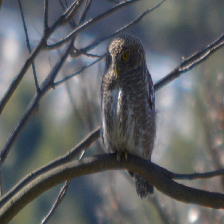

In [ ]:
img = image.load_img('/content/test_data/test_data/jglowl/_D32_10593.jpg', target_size = (224, 224))
img

In [ ]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
pred = np.argmax(v_model.predict(img))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 19ms/step
4
cmnmyn


In [ ]:
img1 = image.load_img('/content/test_data/test_data/wcrsrt/11382746854_7ce73793b3_o.jpg', target_size = (224, 224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0) 
pred = np.argmax(v_model.predict(img1))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 21ms/step
4
cmnmyn


In [ ]:
img2 = image.load_img('/content/test_data/test_data/hilpig/P1050045.jpg', target_size = (224, 224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
pred = np.argmax(v_model.predict(img2))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 20ms/step
4
cmnmyn


In [ ]:
img3 = image.load_img('/content/test_data/test_data/cbrtsh/_D32_10313.jpg', target_size = (224, 224))
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3, axis=0)
pred = np.argmax(v_model.predict(img3))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 20ms/step
7
himbul


In [ ]:
# Submitted By - Madhusmita Mukherjee 20BCE2783